# Caltech-UCSD Birds-200-2011 (CUB) - Reader Writer class

## Imports

In [1]:
import numpy as np
import os
import csv
import cv2
import sys
import pandas as pd
from pandas import DataFrame
from PIL import Image
from matplotlib import pyplot as plt
import pprint
from cub_read_write_class  import CUB_ReadWrite  #importing our class

## Globals

In [2]:
CUB_PATH = "../../CUB_200_2011/"
CSV_PATH = "cub_csv.csv"
PROCESS_CUB = True

## Helpers (functions for the demo only)

In [3]:
# read csv file into pandas dataframe
def getCsv(csvPath):
    csvData =  pd.read_csv(csvPath)
    return csvData

# return first top items from dictionary
def head(d, top):
    return dict(list(d.items())[0:top-1])

# draw bounding box, class, image size & box size title on csv row image
def draw_box(csvRow):
    img = cv2.imread(csvRow['filename'])
    img = cv2.rectangle(img, (csvRow['xmin'], csvRow['ymin']), (csvRow['xmax'], csvRow['ymax']), (0, 0, 0), 1)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img,csvRow['class'],(csvRow['xmin'],csvRow['ymin']), font, 0.5,(255,255,255),1)
    cv2.putText(img,str(csvRow['image-width'])+"x"+str(csvRow['image-height']),(0,csvRow['image-height']), font, 0.4,(255,255,255),1)
    cv2.putText(img,str(csvRow['width'])+"x"+str(csvRow['height']),(csvRow['xmin'],csvRow['ymax']), font, 0.3,(255,255,255),1)

    return img


#display csv images from csv rows dataset 
def showCsvImages(csvRows):
    for idx in range(len(csvRows.index)):
        row = csvRows.iloc[idx]
        pilImage = Image.fromarray(cv2.cvtColor(draw_box(row),cv2.COLOR_BGR2RGB))
        display(pilImage)

## CUB read write class (display the class source here for clarity only)

In [4]:
#uncomment to see class source
%pycat cub_read_write_class.py

## Usage sample
- init class object
- print CUB methods data (for demo only)
- write data into the csv file
- read CUB csv file
- debug print 10 lines header
- display sample image (by number) with bounding box and class as title

In [5]:
if (PROCESS_CUB):   # enables reloading the notebook wothout reading the data (csv read mode only)
    try:
        cub = CUB_ReadWrite(CUB_PATH)         # initialize class object cub
    except ValueError as e:
        print("error in class constructor: ",e)
        sys.exit()
    
    # this part is class methods demo (prints the class methods returned data) 
    # ---------------------------------------------------------------------------------------------------
    print(cub.getCubSize())                      # CUB records (int)
    pprint.pprint(head(cub.getImages(),10))      # images path (dict - {id : path})
    pprint.pprint(head(cub.getImagesSizes(),10)) # images sizes (dict - {id : [width,height]})
    pprint.pprint(head(cub.getImgClasses(),10))  # images class id (dict - {id : class id} )
    pprint.pprint(head(cub.getBoxes(),10))       # images boxes(dict - {id : [xmin, ymin, width, height]})
    pprint.pprint(head(cub.getClasses(),10))     # CUB class names (dict - {id : class name})
    
    # --------------------------------------------------------------------------------------------------
    
    cub.writeCubToCsv(CSV_PATH)           # write CUB data to the csv file
    del(cub)                              # delete cub object
    

(11788, 200)
{1: '../../CUB_200_2011/images\\001.Black_footed_Albatross/Black_Footed_Albatross_0046_18.jpg',
 2: '../../CUB_200_2011/images\\001.Black_footed_Albatross/Black_Footed_Albatross_0009_34.jpg',
 3: '../../CUB_200_2011/images\\001.Black_footed_Albatross/Black_Footed_Albatross_0002_55.jpg',
 4: '../../CUB_200_2011/images\\001.Black_footed_Albatross/Black_Footed_Albatross_0074_59.jpg',
 5: '../../CUB_200_2011/images\\001.Black_footed_Albatross/Black_Footed_Albatross_0014_89.jpg',
 6: '../../CUB_200_2011/images\\001.Black_footed_Albatross/Black_Footed_Albatross_0085_92.jpg',
 7: '../../CUB_200_2011/images\\001.Black_footed_Albatross/Black_Footed_Albatross_0031_100.jpg',
 8: '../../CUB_200_2011/images\\001.Black_footed_Albatross/Black_Footed_Albatross_0051_796103.jpg',
 9: '../../CUB_200_2011/images\\001.Black_footed_Albatross/Black_Footed_Albatross_0010_796097.jpg'}
{1: [500, 335],
 2: [500, 336],
 3: [500, 347],
 4: [415, 500],
 5: [331, 380],
 6: [500, 470],
 7: [500, 340],
 8

In [6]:
csvData = getCsv(CSV_PATH)    # read csv file into csvData object
csvData.head(10)              # show first 10 lines

,filename,image-width,image-height,class,xmin,ymin,xmax,ymax,centerx,centery,width,height
0,../../CUB_200_2011/images\001.Black_footed_Alb...,500,335,001.Black_footed_Albatross,60,27,385,331,222,179,325,304
1,../../CUB_200_2011/images\001.Black_footed_Alb...,500,336,001.Black_footed_Albatross,139,30,292,294,215,162,153,264
2,../../CUB_200_2011/images\001.Black_footed_Alb...,500,347,001.Black_footed_Albatross,14,112,402,298,208,205,388,186
3,../../CUB_200_2011/images\001.Black_footed_Alb...,415,500,001.Black_footed_Albatross,112,90,367,332,239,211,255,242
4,../../CUB_200_2011/images\001.Black_footed_Alb...,331,380,001.Black_footed_Albatross,70,50,204,353,137,201,134,303
5,../../CUB_200_2011/images\001.Black_footed_Alb...,500,470,001.Black_footed_Albatross,33,53,284,448,158,250,251,395
6,../../CUB_200_2011/images\001.Black_footed_Alb...,500,340,001.Black_footed_Albatross,7,75,427,337,217,206,420,262
7,../../CUB_200_2011/images\001.Black_footed_Alb...,500,391,001.Black_footed_Albatross,78,86,411,244,244,165,333,158
8,../../CUB_200_2011/images\001.Black_footed_Alb...,500,416,001.Black_footed_Albatross,112,76,333,265,222,170,221,189
9,../../CUB_200_2011/images\001.Black_footed_Alb...,250,208,001.Black_footed_Albatross,27,4,226,205,126,104,199,201


Found 5 records


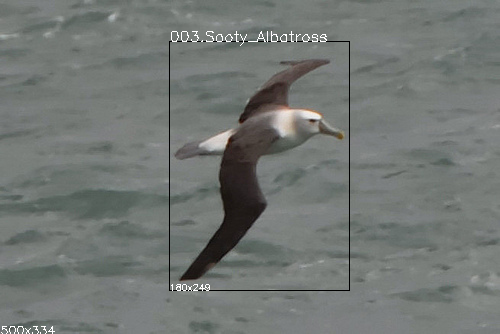

In [7]:
# query csv dataframe display each, including bounding box and class as title
# (uncomment for different queries samples)

#query by partial class name
#csvRows = csvData[csvData['class'].str.contains("Pelican")]

# query by image numbers
csvRows = csvData.iloc[123:128]

# query by iamge size
#csvRows = csvData[(csvData['image-width'] < 500) & (csvData['image-height'] < 400)] 

found = len(csvRows.index)
if (found > 0):
    print ("Found {} records".format(found)) 
    showCsvImages(csvRows)
else:
    print ("No records found")